In [1]:
from os.path import join, isfile
from os import listdir
import numpy as np
import csv
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import figure
from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

%matplotlib notebook

In [2]:
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien"
syn_list = ['ADNP', 'ANKRD11','CDK13', 'DEAF1', 'DYRK1A', 'EHMT1', 'FBXO11', 'KDVS', 'SON', 'WAC', 'YY1']

In [3]:
LEFT = [0, 1, 2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341]
RIGHT = [9, 10, 11, 12, 13, 14, 15, 16, 17, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 157, 158, 168, 173, 174, 190, 191, 205, 210, 213, 217, 262, 263, 269, 278, 281, 282, 284, 288, 292, 294, 295, 296, 297, 298, 299, 302, 304, 305, 306, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509]

In [4]:
def read_rep(syn, syn_csv, ID_csv, data_dir):
    
    # open directories
    syn_dir = data_dir+"\\{}-patients".format(syn)
    ID_dir = data_dir+ "\\{}-selected-ID-controls".format(syn)

    # get list of filenames
    files_syn = [f for f in listdir(syn_dir) if (isfile(join(syn_dir, f))) and ".jpg" in f]
    files_ID = [f for f in listdir(ID_dir) if (isfile(join(ID_dir, f))) and ".jpg" in f]
    
    data_syn, data_ID, labels_syn, labels_ID = [], [], [], []
    
    with open (syn_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for index, row in enumerate(reader):
            if row[0] in files_syn: 
                rep = list(map(float, row[1:]))
                data_syn.append(rep)
                labels_syn.append(1)

    with open (ID_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for index, row in enumerate(reader):
            if row[0] in files_ID:
                rep = list(map(float, row[1:]))
                data_ID.append(rep)
                labels_ID.append(0)

    return np.array(data_syn), np.array(data_ID), np.array(labels_syn), np.array(labels_ID)

In [5]:
def load_data(syn, GENERAL_DIR, data_dir): 
    
    method = "facereader-landmarks-distances"
    syn_csv = GENERAL_DIR+ "\\features_facereader_landmarks_distances_patient_groups_left_right.csv"
    ID_csv = GENERAL_DIR+ "\\features_facereader_landmarks_distances_all_controls_left_right.csv"    
    data_syn_dis, data_ID_dis, labels_syn_dis, labels_ID_dis = read_rep(syn, syn_csv, ID_csv, data_dir)  
        
    indices_to_keep = []
    
    for index, rep in enumerate(data_syn_dis):
        if not all(v == 0 for v in data_syn_dis[index]) and not all(v == 0 for v in data_ID_dis[index]):
            indices_to_keep.append(index)
                  
    # only distance with facereader rep
    data_syn_dis = data_syn_dis[indices_to_keep]
    data_ID_dis = data_ID_dis[indices_to_keep]
    data_dis = data_syn_dis.tolist() + data_ID_dis.tolist()
    
    # labels with facereader rep
    labels_syn_dis = labels_syn_dis[indices_to_keep]
    labels_ID_dis = labels_ID_dis[indices_to_keep]
    labels = labels_syn_dis.tolist() + labels_ID_dis.tolist() 

    return np.array(data_dis), np.array(labels)


In [6]:
def randomforest_classifier(data, labels):

    forest = RandomForestClassifier(n_estimators=10,random_state=0) # 10 has been found with best aroc scores
    forest.fit(data, labels)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    
    for i in range(1, 30):
        important_indices = indices[0:i] 
        importance = sum(importances[important_indices])
        if importance >= 0.8:
            break
            
    return important_indices, importance

In [7]:
def random_image(GENERAL_DIR, syn):
    
    file = GENERAL_DIR+ "\\features_facereader_landmarks_patient_groups.csv"

    # Find random image of syndrome and retrieve keypoints 
    with open(file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if syn in row[0] and len(row[1:]) > 93:
                print(len(row[1:]))
                landmarks_left, landmarks_right = [], []
                i = 1
                count = 0

                while i < len(row[1:]):
                    if count in LEFT:
                        landmarks_left.append((float(row[i]), float(row[i+1]), float(row[i+2])))
                    if count in RIGHT:
                        landmarks_right.append((float(row[i]), float(row[i+1]), float(row[i+2])))

                    count += 1
                    i+=3   

                return landmarks_left, landmarks_right, row[0]          

In [8]:
def get_pairs():
    pairs = []
    combs = [comb for comb in itertools.combinations([*range(0, len(LEFT))], 2)]
    
    for comb in combs:
        a = comb[0]
        b = comb[1]
        pairs.append([a, b])
        
    return pairs

In [9]:
def visualize_image(landmarks_left, landmarks_right, important_indices, pairs, image_name, nr_feats, importance):
    fig = figure(figsize=(8,8))
    ax = Axes3D(fig)

    for [x, y, z] in landmarks_left:
        ax.scatter(x, y, z, color='b') 
    for [x, y, z] in landmarks_right:
        ax.scatter(x, y, z, color='r') 
            
    combs = [comb for comb in itertools.combinations([*range(0, len(LEFT))], 2)]
    amount_dis = len(combs)
       
    for index in important_indices:
        if index < amount_dis:
            [a, b] = pairs[index]        
            [x, y, z] = landmarks_left[a]
            [x2, y2, z2] = landmarks_left[b]
            ax.plot((x, x2), (y, y2), (z, z2)) 
        else:
            
            index = index - amount_dis
            [a, b] = pairs[index]        
            [x, y, z] = landmarks_right[a]
            [x2, y2, z2] = landmarks_right[b]
            ax.plot((x, x2), (y, y2), (z, z2)) 
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    title = "{}: with {} features and {:.3f} importance".format(image_name, nr_feats, importance)
    ax.set_title(title)
    plt.show()

1530


<IPython.core.display.Javascript object>


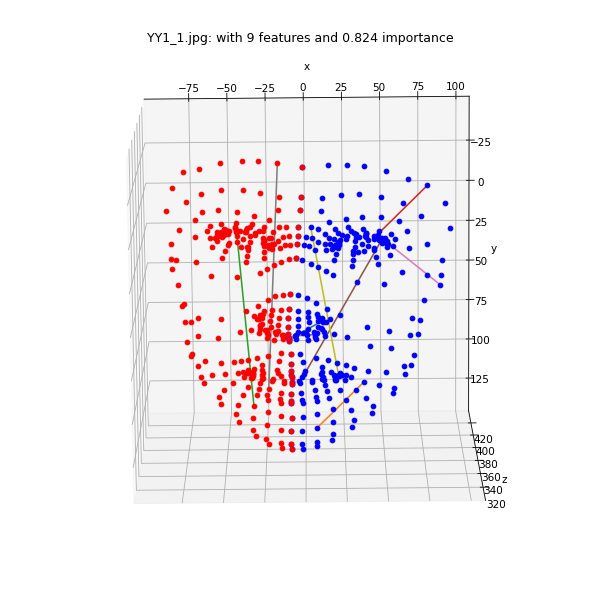

In [21]:
# syn_list = ['ADNP', 'ANKRD11','CDK13', 'DEAF1', 'DYRK1A', 'EHMT1', 'FBXO11', 'KDVS', 'SON', 'WAC', 'YY1']
#for syn in syn_list:
syn = 'YY1'   

# load all data of this syn 
data_dir = GENERAL_DIR + "\\{}".format(syn) 
data, labels = load_data(syn, GENERAL_DIR, data_dir)
data = Normalizer().fit_transform(data)

# train complete random forest model and return indices
indices, importance = randomforest_classifier(data, labels)
landmark_pairs = get_pairs()

# get landmarks and image name of a random face
landmarks_left, landmarks_right, image_name = random_image(GENERAL_DIR, syn)
visualize_image(landmarks_left, landmarks_right, indices, landmark_pairs, image_name, len(indices), importance)



    #break